In [1]:
##api details
import requests
import json
# set the siteurl
site_url = 'https://dadosabertos.camara.leg.br/api/v2/votacoes'

response = requests.get(site_url)
response_json = response.json()

print(f"Output \n *** Response from {site_url} is {response.status_code} ")

Output 
 *** Response from https://dadosabertos.camara.leg.br/api/v2/votacoes is 200 


In [2]:
text = json.dumps(response.json()["dados"], sort_keys=True, indent=4)
dictionary = json.loads(text)

In [3]:
type(dictionary)

list

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

##csv usados
df = pd.read_csv("votacoes-2022.csv", sep=';')
dfV = pd.read_csv("votacoesVotos-2022.csv", sep=';')
dfO =  pd.read_csv("votacoesOrientacoes-2022.csv", sep=';')
deputados = pd.read_csv("deputados.csv", sep=';')

## Votações

Todas as informações necessárias sobre todas as  votações das comissões e do Plenário da Câmara, por ano em que tenham ocorrido

Para cada votação, há a data informada, data e hora de registro nos sistemas da Câmara, descrição do resultado da votação, identificadores do Órgão e do Evento, um indicador que diz se a votação resultou em aprovação ou não da proposição votada, um placar resumido e, se disponíveis, dados sobre a abertura de votação e a apresentação de proposição que tenham ocorrido logo antes da votação

In [5]:
##votacoes
df

,id,uri,data,dataHoraRegistro,idOrgao,uriOrgao,siglaOrgao,idEvento,uriEvento,aprovacao,votosSim,votosNao,votosOutros,descricao,ultimaAberturaVotacao_dataHoraRegistro,ultimaAberturaVotacao_descricao,ultimaApresentacaoProposicao_dataHoraRegistro,ultimaApresentacaoProposicao_descricao,ultimaApresentacaoProposicao_idProposicao,ultimaApresentacaoProposicao_uriProposicao
0,2276475-116,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-02,2022-02-02T19:58:52,180,https://dadosabertos.camara.leg.br/api/v2/orga...,PLEN,64635,https://dadosabertos.camara.leg.br/api/v2/even...,1.0,0,0,0,Aprovada a Redação Final assinada pela Relator...,2022-02-02T19:58:34,Votação da Redação Final.,2022-02-02T19:24:34,"Parecer às Emendas do Senado, pela relatora, D...",2313950,https://dadosabertos.camara.leg.br/api/v2/prop...
1,2236607-112,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-02,2022-02-02T19:10:58,180,https://dadosabertos.camara.leg.br/api/v2/orga...,PLEN,64635,https://dadosabertos.camara.leg.br/api/v2/even...,0.0,0,0,0,Rejeitadas as Emendas do Senado Federal ao Pro...,2022-02-02T19:10:35,Votação das Emendas do Senado Federal ao Proje...,2022-02-02T19:09:03,Parecer às Emendas do Senado proferido pelo Re...,2313947,https://dadosabertos.camara.leg.br/api/v2/prop...
2,2276475-96,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-02,2022-02-02T19:20:51,180,https://dadosabertos.camara.leg.br/api/v2/orga...,PLEN,64635,https://dadosabertos.camara.leg.br/api/v2/even...,0.0,0,0,0,Rejeitado o Requerimento.,NaN,NaN,NaN,Apresentação da Emenda/Substitutivo do Senado ...,2295258,https://dadosabertos.camara.leg.br/api/v2/prop...
3,2276475-107,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-02,2022-02-02T19:40:26,180,https://dadosabertos.camara.leg.br/api/v2/orga...,PLEN,64635,https://dadosabertos.camara.leg.br/api/v2/even...,1.0,0,0,0,"Aprovadas as Emendas do Senado Federal nºs 1, ...",2022-02-02T19:38:58,"Votação das Emendas do Senado Federal, com par...",2022-02-02T19:24:34,"Parecer às Emendas do Senado, pela relatora, D...",2313950,https://dadosabertos.camara.leg.br/api/v2/prop...
4,2276475-111,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-02,2022-02-02T19:49:36,180,https://dadosabertos.camara.leg.br/api/v2/orga...,PLEN,64635,https://dadosabertos.camara.leg.br/api/v2/even...,1.0,0,0,0,Aprovada a Emenda do Senado Federal n° 2.,2022-02-02T19:41:39,Votação do DTQ 1: NOVO: Emenda do Senado Feder...,2022-02-02T19:24:34,"Parecer às Emendas do Senado, pela relatora, D...",2313950,https://dadosabertos.camara.leg.br/api/v2/prop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,2314962-21,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11,2022-10-11T17:37:40,100001,https://dadosabertos.camara.leg.br/api/v2/orga...,SECAP(SGM),0,NaN,1.0,0,0,0,Realizar o encaminhamento do PLP-7/2022 à CCJC...,NaN,NaN,NaN,NaN,0,NaN
3835,2314962-22,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11,2022-10-11T17:37:40,100001,https://dadosabertos.camara.leg.br/api/v2/orga...,SECAP(SGM),0,NaN,1.0,0,0,0,Realizar o encaminhamento do PLP-7/2022 à CFT ...,NaN,NaN,NaN,NaN,0,NaN
3836,2314962-23,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11,2022-10-11T17:37:41,100001,https://dadosabertos.camara.leg.br/api/v2/orga...,SECAP(SGM),0,NaN,1.0,0,0,0,Realizar o encaminhamento do PLP-7/2022 à CFT ...,NaN,NaN,NaN,NaN,0,NaN
3837,2314962-24,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11,2022-10-11T17:37:41,180,https://dadosabertos.camara.leg.br/api/v2/orga...,PLEN,0,NaN,1.0,0,0,0,Alteração do Regime de Tramitação desta propos...,NaN,NaN,NaN,NaN,0,NaN


In [6]:
len(df)

3839

In [7]:
df.columns

Index(['id', 'uri', 'data', 'dataHoraRegistro', 'idOrgao', 'uriOrgao',
       'siglaOrgao', 'idEvento', 'uriEvento', 'aprovacao', 'votosSim',
       'votosNao', 'votosOutros', 'descricao',
       'ultimaAberturaVotacao_dataHoraRegistro',
       'ultimaAberturaVotacao_descricao',
       'ultimaApresentacaoProposicao_dataHoraRegistro',
       'ultimaApresentacaoProposicao_descricao',
       'ultimaApresentacaoProposicao_idProposicao',
       'ultimaApresentacaoProposicao_uriProposicao'],
      dtype='object')

In [8]:
##percentagem de valores NULL no dataset
percent= df.isnull().sum() * 100 / len(df)
missing_value = pd.DataFrame({'percent_missing': percent})
missing_value.sort_values('percent_missing', inplace=True)
missing_value

,percent_missing
id,0.000000
uri,0.000000
data,0.000000
idOrgao,0.000000
uriOrgao,0.000000
siglaOrgao,0.000000
idEvento,0.000000
descricao,0.000000
ultimaApresentacaoProposicao_idProposicao,0.000000
votosSim,0.000000


In [9]:
df = df.drop(['ultimaAberturaVotacao_dataHoraRegistro',
       'ultimaAberturaVotacao_descricao',
       'ultimaApresentacaoProposicao_dataHoraRegistro',
       'ultimaApresentacaoProposicao_descricao'], axis=1)

In [10]:
df.describe()

,idOrgao,idEvento,aprovacao,votosSim,votosNao,votosOutros,ultimaApresentacaoProposicao_idProposicao
count,3839.000000,3839.000000,3717.000000,3839.000000,3839.000000,3839.000000,3.839000e+03
mean,81748.399323,59904.247721,0.892924,24.156812,18.522532,0.726752,1.218168e+06
std,184458.754603,18287.625461,0.309251,80.379162,63.740223,6.155074,1.156936e+06
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,180.000000,65006.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2009.000000,65385.000000,1.000000,0.000000,0.000000,0.000000,2.284940e+06
75%,5503.000000,65787.000000,1.000000,0.000000,0.000000,0.000000,2.323545e+06
max,539072.000000,66455.000000,1.000000,473.000000,430.000000,109.000000,2.335502e+06


In [11]:
##correlation matrix
# data = pd.DataFrame(df,columns=['idOrgao', 'uriOrgao',
#        'siglaOrgao', 'idEvento', 'uriEvento', 'aprovacao', 'votosSim',
#        'votosNao', 'votosOutros', 'descricao'])

# corrMatrix = data.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [12]:
##partidos com mais registos de votações 
print("Numero total de Orgãos:" , len(df["siglaOrgao"].value_counts()))
print("Partidos, do maior e do menor, com mais registos de votações:", df["siglaOrgao"].value_counts())

Numero total de Orgãos: 59
Partidos, do maior e do menor, com mais registos de votações: PLEN          1014
CCJC           468
SECAP(SGM)     221
CSSF           218
CTASP          168
CCTCI          135
CFT            123
CSPCCO         100
CVT             98
CE              98
CFFC            88
CMADS           86
CDHM            82
CMULHER         77
CCULT           75
CLP             73
CAPADR          67
CDEICS          67
CIDOSO          62
CME             61
CPD             61
CESPO           45
CREDN           29
CDC             29
CINDRA          29
CTUR            25
GTSISGOV        23
CEXJAVAR        20
PEC00720        18
PL646119        14
CEXMEC          13
MERCOSUL        13
GTADVPUB        12
PEC01522        12
CEXSITPE        11
PL649419        11
CECANCER        10
CMO              9
CEXWAIKA         9
GTPL3890         8
CESUBCRE         8
PEC01821         6
MESA             6
CEXINFAN         6
CEXPETRJ         6
GTMINE22         3
GTPL2564         3
GTJOVENS         3

<AxesSubplot:>

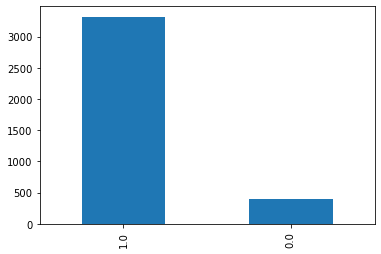

In [13]:
##contagem de aprovacçao
df["aprovacao"].value_counts().plot(kind="bar")

In [14]:
##votos em que a moçao foi aprovada
dfY = df.loc[df['aprovacao'] == 1.0]
##10 orgaos que tem maior numero de propostas aprovadas(???)
dfY["siglaOrgao"].value_counts()[:10]

PLEN          642
CCJC          448
SECAP(SGM)    221
CSSF          203
CTASP         166
CCTCI         134
CFT           102
CVT            92
CFFC           88
CSPCCO         87
Name: siglaOrgao, dtype: int64

In [15]:
len(dfY)

3319

In [16]:
##votos em que a moçao foi reprovada
dfN = df.loc[df['aprovacao'] == 0.0]

In [17]:
len(dfN)

398

In [18]:
##10 orgaos que tem maior numero de propostas reprovadas(???)
dfN["siglaOrgao"].value_counts()[:10]

PLEN      250
CFT        21
CCJC       20
CE         20
CSSF       15
CSPCCO     13
CMADS      10
CVT         6
CME         5
CAPADR      5
Name: siglaOrgao, dtype: int64

In [19]:
## top 10 razoes pelos propostas sao rejeitadas
dfN["descricao"].value_counts()[:10]

Rejeitado o Requerimento de Retirada de Pauta.                                                 21
Rejeitado.                                                                                     17
Rejeitado o Requerimento.                                                                      10
Rejeitadas as Emendas de Comissão.                                                              5
Rejeitado o Parecer.                                                                            4
Rejeitada a Emenda de Plenário nº 1.                                                            4
Rejeitado o Requerimento de Retirada de Pauta, apresentado pelo Deputado Alexandre Padilha.     3
Rejeitadas as Emendas de Plenário.                                                              3
Rejeitado o Requerimento, com o voto contrário do Deputado Arlindo Chinaglia.                   3
Rejeitada a Emenda de Plenário.                                                                 2
Name: descricao, dty

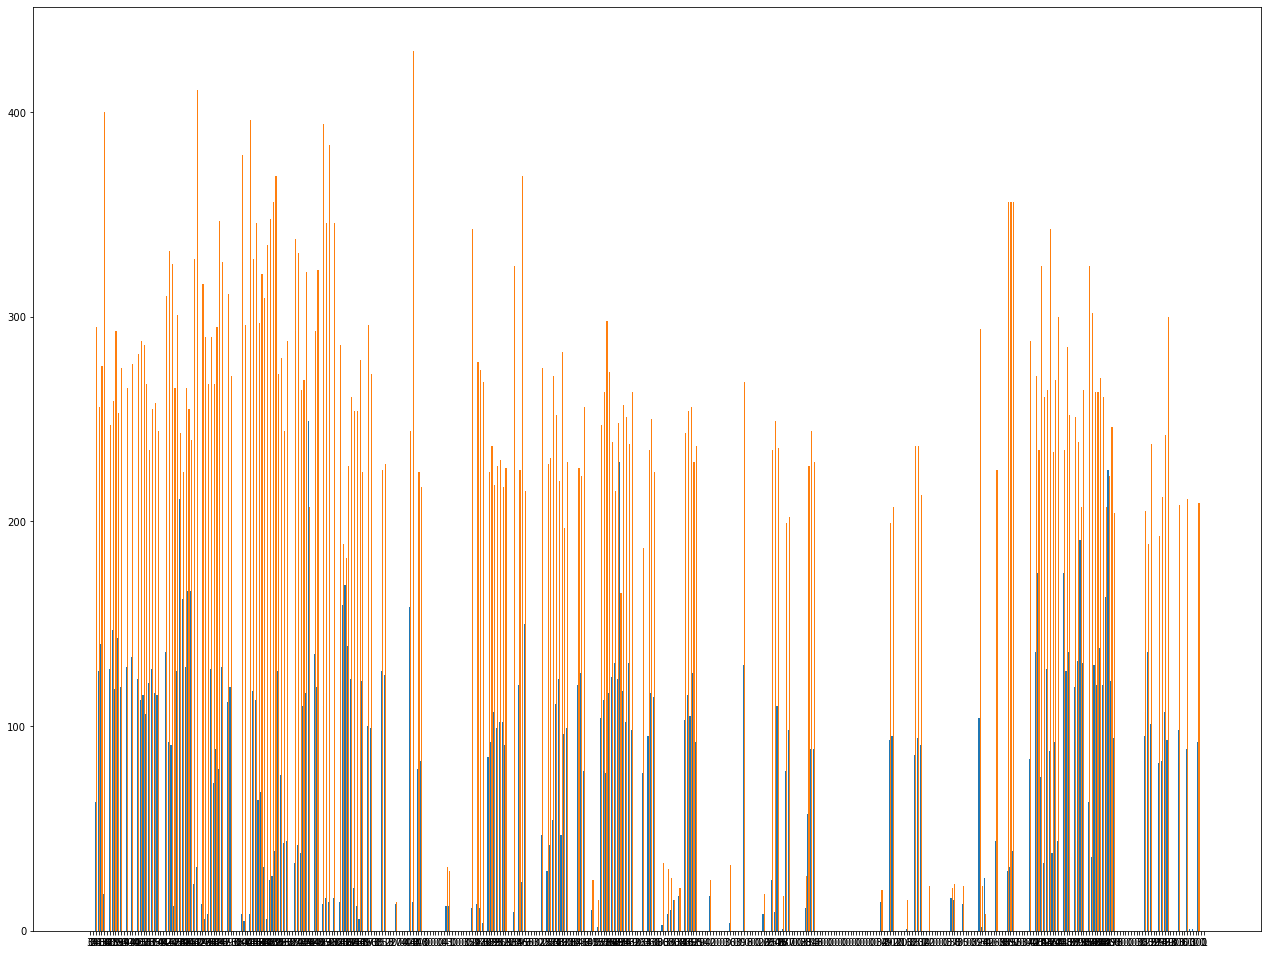

In [20]:
##Bar Plot que distinga o numero de votos a favor e contra
X = (dfN["votosSim"] + dfN["votosNao"])
yYes = dfN["votosSim"]
zNo = dfN["votosNao"]

##double bar plot
X_axis = np.arange(len(X))
plt.figure(figsize=(22,17))

plt.bar(X_axis - 0.2, yYes, 0.4)
plt.bar(X_axis + 0.2, zNo, 0.4)

plt.xticks(X_axis,X)
plt.show()

## Votações por ano

Neste caso 2022

Separados por ano de ocorrência das votações, estes arquivos têm, em cada linha/registro, identificadores de uma votação, os identificadores básicos de cada Deputado, o voto (ou posicionamento de obstrução) registrado pelo parlamentar e o horário de registro do voto.

In [21]:
##votaçoes no ano de 2022
dfV[:10]

,idVotacao,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto
0,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:19:31,Não,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,http://www.camara.gov.br/internet/deputado/ban...
1,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:12:14,Não,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,http://www.camara.gov.br/internet/deputado/ban...
2,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:11:00,Não,121948,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriano do Baldy,PP,https://dadosabertos.camara.leg.br/api/v2/part...,GO,56,http://www.camara.gov.br/internet/deputado/ban...
3,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:11:49,Sim,74646,https://dadosabertos.camara.leg.br/api/v2/depu...,Aécio Neves,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...
4,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:13:40,Não,141372,https://dadosabertos.camara.leg.br/api/v2/depu...,Aelton Freitas,PP,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...
5,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:18:00,Sim,204495,https://dadosabertos.camara.leg.br/api/v2/depu...,Airton Faleiro,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PA,56,http://www.camara.gov.br/internet/deputado/ban...
6,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:18:12,Não,204549,https://dadosabertos.camara.leg.br/api/v2/depu...,AJ Albuquerque,PP,https://dadosabertos.camara.leg.br/api/v2/part...,CE,56,http://www.camara.gov.br/internet/deputado/ban...
7,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:11:24,Não,204413,https://dadosabertos.camara.leg.br/api/v2/depu...,Alcides Rodrigues,PATRIOTA,https://dadosabertos.camara.leg.br/api/v2/part...,GO,56,http://www.camara.gov.br/internet/deputado/ban...
8,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:11:28,Não,204545,https://dadosabertos.camara.leg.br/api/v2/depu...,Alê Silva,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...
9,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:11:20,Sim,204501,https://dadosabertos.camara.leg.br/api/v2/depu...,Alencar Santana,PT,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,http://www.camara.gov.br/internet/deputado/ban...


In [22]:
dfV.columns

Index(['idVotacao', 'uriVotacao', 'dataHoraVoto', 'voto', 'deputado_id',
       'deputado_uri', 'deputado_nome', 'deputado_siglaPartido',
       'deputado_uriPartido', 'deputado_siglaUf', 'deputado_idLegislatura',
       'deputado_urlFoto'],
      dtype='object')

In [23]:
##percentagem de valores NULL no dataset
percent= dfV.isnull().sum() * 100 / len(df)
missing_value = pd.DataFrame({'percent_missing': percent})
missing_value.sort_values('percent_missing', inplace=True)
missing_value

,percent_missing
idVotacao,0.0
uriVotacao,0.0
dataHoraVoto,0.0
voto,0.0
deputado_id,0.0
deputado_uri,0.0
deputado_nome,0.0
deputado_siglaPartido,0.0
deputado_uriPartido,0.0
deputado_siglaUf,0.0


In [24]:
##Quais os deputados que apresentam mais votos
dfV["deputado_nome"].value_counts()[:10]

Daniel Silveira        446
Tiago Mitraud          441
Gilson Marques         438
Dra. Soraya Manato     438
Adriana Ventura        437
Marcel van Hattem      432
Rodrigo Agostinho      431
Ossesio Silva          430
Luiz Antônio Corrêa    430
Luiz Lima              428
Name: deputado_nome, dtype: int64

In [25]:
dfV.loc[dfV["deputado_nome"]== "Daniel Silveira"]

,idVotacao,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto
77,105464-319,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:12:23,Não,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
430,105464-326,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-04T13:28:03,Não,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
672,1116134-78,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-06-07T16:21:43,Sim,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
796,1215346-62,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-06-08T17:52:59,Sim,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
1201,1215346-65,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-06-08T18:30:10,Não,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
...,...,...,...,...,...,...,...,...,...,...,...,...
166514,534328-203,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-05-19T14:44:54,Não,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
166977,596844-116,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-08-03T18:18:30,Sim,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
167375,622070-128,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-05-05T11:48:04,Sim,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...
167711,622828-9,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-18T18:25:16,Sim,204454,https://dadosabertos.camara.leg.br/api/v2/depu...,Daniel Silveira,PTB,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,http://www.camara.gov.br/internet/deputado/ban...


### Partidos 

In [26]:
##Partidos com mais afluencia ~ 
dfV["deputado_siglaPartido"].value_counts()

PL               22745
PT               19630
PP               15922
UNIÃO            15420
PSD              13679
REPUBLICANOS     13512
MDB              10731
PSB               8821
PSDB              7991
PDT               7442
NOVO              3332
PSC               3128
PODE              2946
PSOL              2927
PCdoB             2880
PSL               2718
SOLIDARIEDADE     2580
AVANTE            2190
CIDADANIA         2175
PROS              2087
PTB               1660
PATRIOTA          1449
PV                1204
DEM               1075
REDE               618
S.PART.             44
Name: deputado_siglaPartido, dtype: int64

In [27]:
## voto agrupado por sigla do partido de cada deputado; descreve como é que cada partido vota
a=[]
a = dfV.groupby(['deputado_siglaPartido','voto','idVotacao']).size().reset_index()
a

,deputado_siglaPartido,voto,idVotacao,0
0,AVANTE,Abstenção,105464-319,1
1,AVANTE,Abstenção,2242238-17,1
2,AVANTE,Abstenção,2313781-39,1
3,AVANTE,Abstenção,2313781-47,1
4,AVANTE,Abstenção,2313781-57,2
...,...,...,...,...
15156,UNIÃO,Sim,601739-113,1
15157,UNIÃO,Sim,622070-128,26
15158,UNIÃO,Sim,622828-9,33
15159,UNIÃO,Sim,945554-180,3


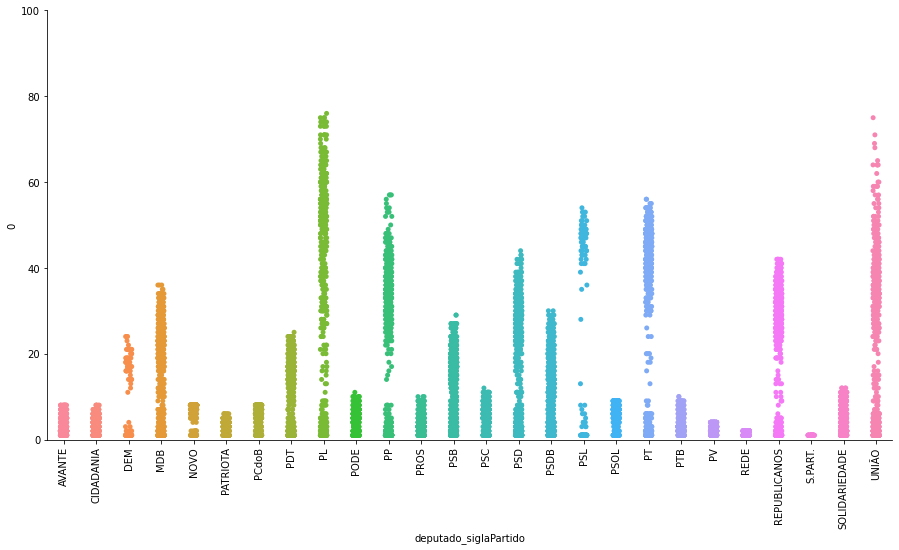

In [28]:
#Categorical Scatter Plot 
g=sns.catplot(x='deputado_siglaPartido', y=0,data=a)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,100))
plt.show() 

In [29]:
a["deputado_siglaPartido"].value_counts()

PP               911
PSD              839
PL               822
PSDB             802
PSB              765
MDB              757
AVANTE           731
UNIÃO            725
PDT              719
CIDADANIA        662
REPUBLICANOS     656
PT               654
SOLIDARIEDADE    629
PODE             617
PSC              568
PROS             550
PTB              541
PV               538
PCdoB            513
PSOL             499
NOVO             494
PATRIOTA         477
REDE             429
PSL              119
DEM              100
S.PART.           44
Name: deputado_siglaPartido, dtype: int64

In [30]:
#Maneira de votar- contagem de votos partidos
def voteType(party):
    party = dfV.loc[dfV["deputado_siglaPartido"] == party]
    voting = party["voto"].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,10))
    return voting
#Maneira de votar- contagem de votos deputados
def voteTypeD(deputy, party):
    deputy = dfV.loc[dfV["deputado_nome"] == deputy]
    df = deputy.loc[deputy["deputado_siglaPartido"] == party]
    voting = df["voto"].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,10))
    return voting

<AxesSubplot:>

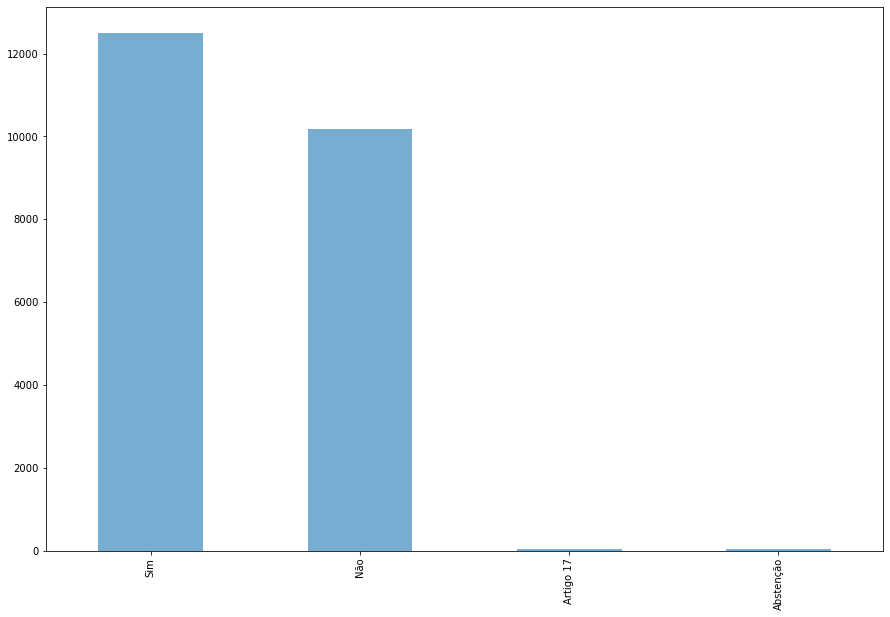

In [31]:
voteType("PL")

### Deputados

In [32]:
b = dfV.groupby(['deputado_nome','deputado_siglaPartido', "voto"]).size().reset_index()
b

,deputado_nome,deputado_siglaPartido,voto,0
0,AJ Albuquerque,PP,Não,151
1,AJ Albuquerque,PP,Sim,182
2,Abou Anni,PSL,Não,17
3,Abou Anni,PSL,Sim,28
4,Abou Anni,UNIÃO,Não,139
...,...,...,...,...
1877,Átila Lira,PP,Não,140
1878,Átila Lira,PP,Sim,183
1879,Áurea Carolina,PSOL,Não,141
1880,Áurea Carolina,PSOL,Obstrução,13


In [33]:
##Por diferentes partidos, quantas vezes votaram e como votaram
b["deputado_nome"].value_counts()[:20]

Léo Motta                 12
Flávio Nogueira            9
Chris Tonietto             8
Márcio Labre               8
Filipe Barros              7
Luiz Lima                  7
Rubens Pereira Júnior      7
Sanderson                  7
Júlio Delgado              7
Carlos Henrique Gaguim     7
Loester Trutis             7
Dr. Luiz Ovando            7
Marcelo Ramos              7
Junio Amaral               7
Marcelo Álvaro Antônio     6
Carla Zambelli             6
Herculano Passos           6
Carlos Jordy               6
Bibo Nunes                 6
Caroline de Toni           6
Name: deputado_nome, dtype: int64

In [34]:
group = b.groupby('deputado_nome')['deputado_siglaPartido'].unique().reset_index()
group

,deputado_nome,deputado_siglaPartido
0,AJ Albuquerque,[PP]
1,Abou Anni,"[PSL, UNIÃO]"
2,Abílio Santana,"[PL, PSC]"
3,Acácio Favacho,"[MDB, PROS]"
4,Adolfo Viana,[PSDB]
...,...,...
550,Zé Silva,[SOLIDARIEDADE]
551,Zé Vitor,[PL]
552,Átila Lins,"[PP, PSD]"
553,Átila Lira,[PP]


In [35]:
group['count']  = group['deputado_siglaPartido'].str.len()
max(group['count']) ##em 2022 o maximo de partidos a que um deputado fez parte sao 4

4

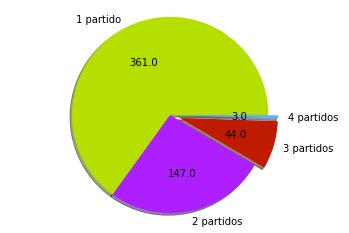

In [36]:
sizes = group['count'].value_counts()
colors = ['#B5DF00','#AD1FFF', '#BF1B00','#5FB1FF']
labels=["1 partido","2 partidos","3 partidos","4 partidos"]

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
exploda = (0, 0, 0.1, 0.1)

plt.pie(sizes,labels=labels, colors=colors,
        autopct=absolute_value,explode = exploda, shadow=True)

plt.axis('equal')
plt.show()

In [37]:
groupMax = group.loc[group['count'] == 4] ## 3 deputados que pertenceram a 4 partidos politicos
groupMax

,deputado_nome,deputado_siglaPartido,count
322,Luiz Lima,"[PL, PSL, S.PART., UNIÃO]",4
330,Léo Motta,"[PL, PSL, REPUBLICANOS, UNIÃO]",4
375,Márcio Labre,"[PL, PSL, S.PART., UNIÃO]",4


<AxesSubplot:>

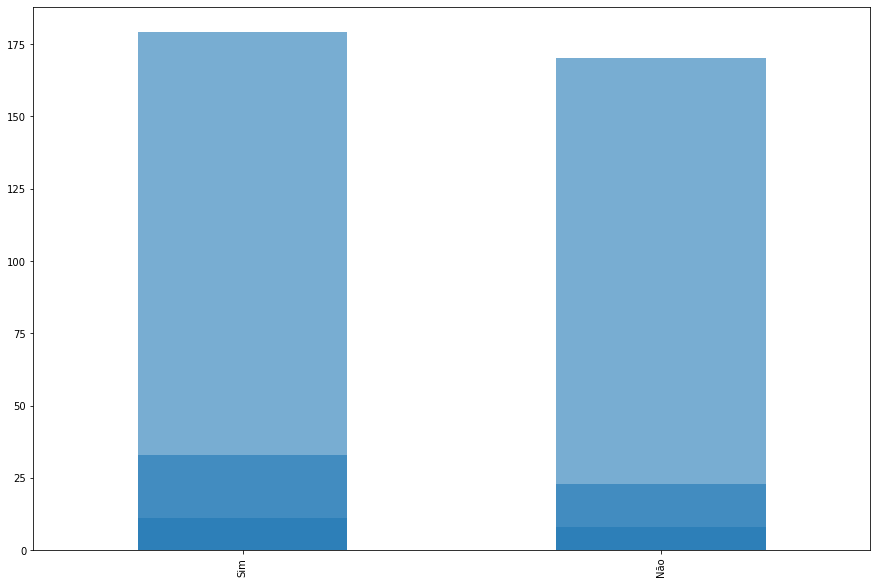

In [38]:
voteTypeD("Luiz Lima", "PL")
voteTypeD("Luiz Lima", "PSL")
# voteTypeD("Luiz Lima", "S.PART") ##NAO EXISTE VOTOS NESTE PARTIDO
voteTypeD("Luiz Lima", "UNIÃO")

<AxesSubplot:>

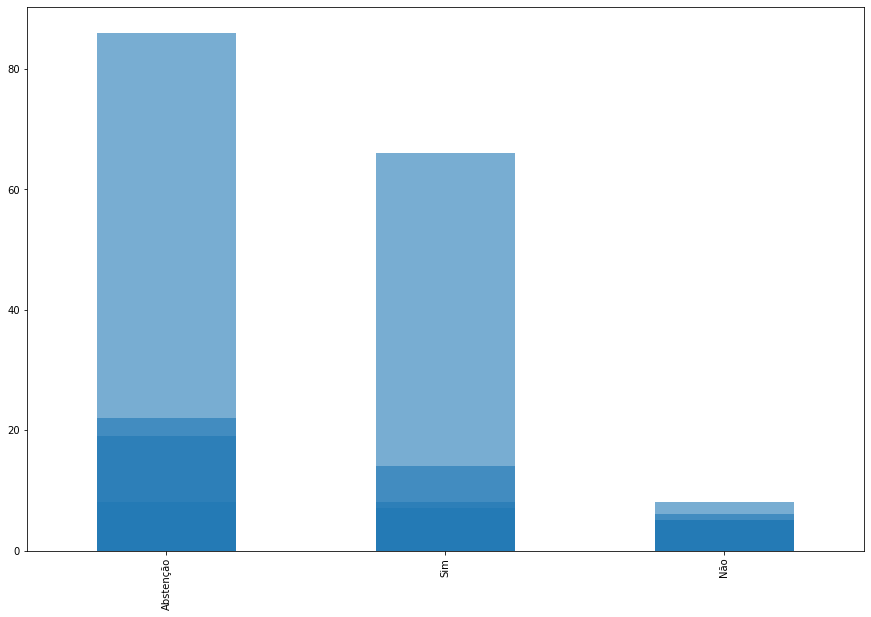

In [39]:
voteTypeD("Léo Motta", "PL")
voteTypeD("Léo Motta", "PSL")
voteTypeD("Léo Motta", "REPUBLICANOS")
voteTypeD("Léo Motta", "UNIÃO")

<AxesSubplot:>

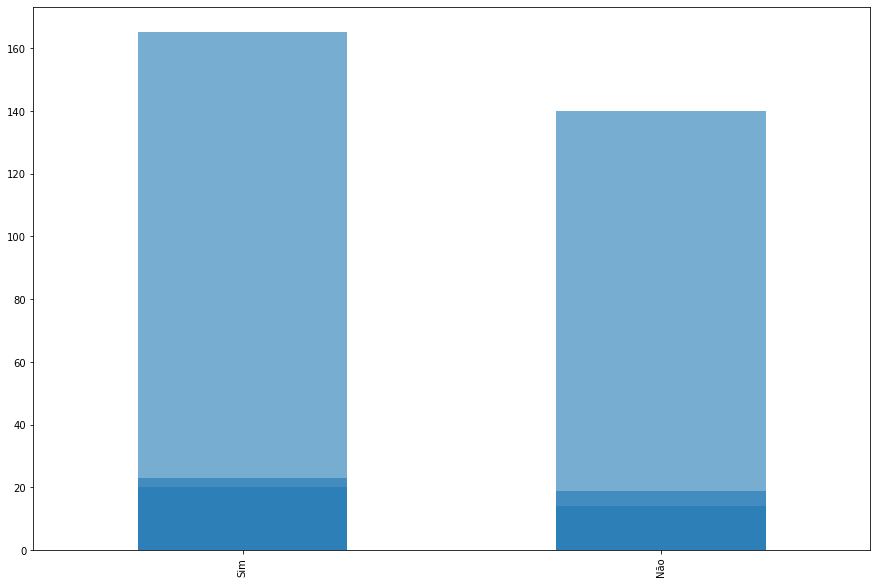

In [40]:
voteTypeD("Márcio Labre", "PL")
voteTypeD("Márcio Labre", "PSL")
# voteTypeD("Márcio Labre", "S.PART")
voteTypeD("Márcio Labre", "UNIÃO")

In [41]:
deputados

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,56,56,JOSE ABILIO SILVA DE SANTANA,NaN,M,NaN,NaN,1965-02-13,NaN,BA,Salvador
1,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,56,56,PAULO SERGIO ABOU ANNI,NaN,M,https://www.facebook.com/DeputadoFederalAbouAn...,http://www.abouanni.com.br,1966-11-06,NaN,SP,São Paulo
2,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,56,56,ACÁCIO DA SILVA FAVACHO NETO,NaN,M,"https://twitter.com/acaciofavacho, https://www...",NaN,1983-09-28,NaN,AP,Macapá
3,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,56,56,ADOLFO VIANA DE CASTRO NETO,NaN,M,NaN,NaN,1981-02-02,NaN,BA,Salvador
4,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,56,56,ADRIANA MIGUEL VENTURA,NaN,F,"https://twitter.com/adriventurasp, https://www...",NaN,1969-03-06,NaN,SP,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7584,https://dadosabertos.camara.leg.br/api/v2/depu...,SOUSA MELO,1,1,José de Souza Mello,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
7585,https://dadosabertos.camara.leg.br/api/v2/depu...,TEIXEIRA DE GOUVEIA,1,1,Lucio Soares Teixeira de Gouvêa,NaN,M,NaN,NaN,1792-05-09,1838-11-21,MG,Mariana
7586,https://dadosabertos.camara.leg.br/api/v2/depu...,VERGUEIRO,1,1,Nicolau Pereira de Campos Vergueiro,NaN,M,NaN,NaN,1778-12-20,1839-09-17,NaN,NaN
7587,https://dadosabertos.camara.leg.br/api/v2/depu...,VICENTE DA FONSECA,1,1,Ignacio José Vicente da Fonseca,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
deputados.columns

Index(['uri', 'nome', 'idLegislaturaInicial', 'idLegislaturaFinal',
       'nomeCivil', 'cpf', 'siglaSexo', 'urlRedeSocial', 'urlWebsite',
       'dataNascimento', 'dataFalecimento', 'ufNascimento',
       'municipioNascimento'],
      dtype='object')

<AxesSubplot:>

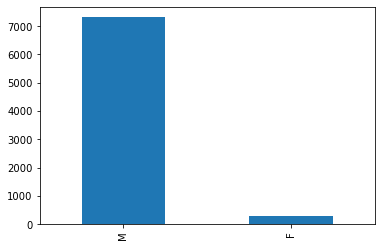

In [43]:
##desde do inicio
deputados["siglaSexo"].value_counts().plot(kind="bar")

<AxesSubplot:>

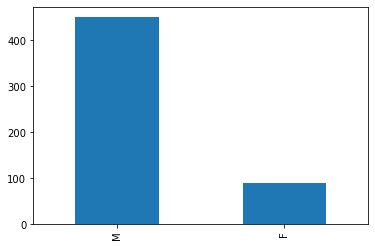

In [44]:
##LESGISLATURA DESDE 2011

deputados.loc[deputados["idLegislaturaInicial"] > 54]["siglaSexo"].value_counts().plot(kind="bar")

<AxesSubplot:>

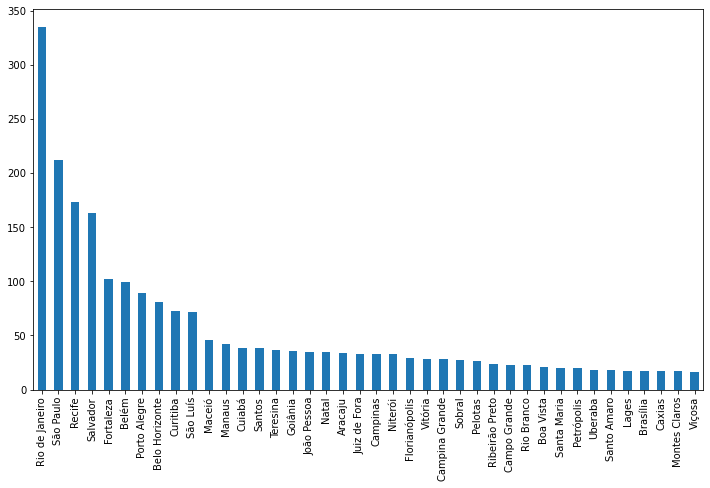

In [45]:
##TODAS LESGISLATURAS

plt.figure(figsize=(12,7))
deputados["municipioNascimento"].value_counts()[:40].plot(kind="bar")

<AxesSubplot:>

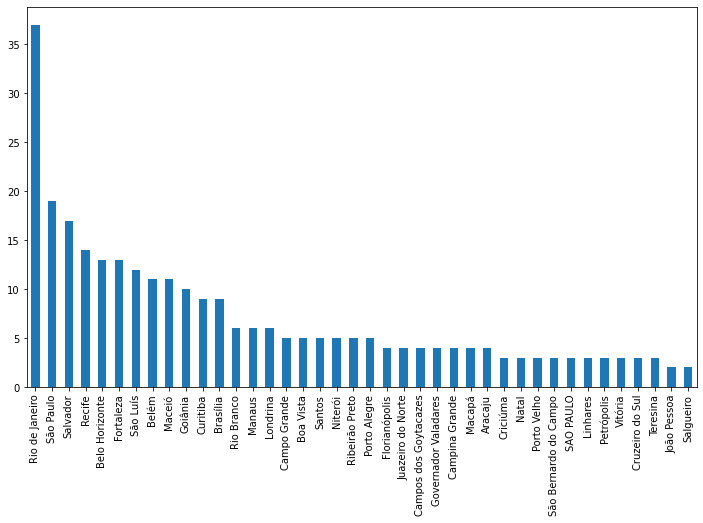

In [46]:
##LESGISLATURA DESDE 2011
plt.figure(figsize=(12,7))

deputados.loc[deputados["idLegislaturaInicial"] > 54]["municipioNascimento"].value_counts()[:40].plot(kind="bar")

In [47]:
from datetime import date

today = date.today()
today.year

##PARA DEPUTADOS APARTIR DA LEGISLATURA 54º
dl = deputados[deputados["idLegislaturaInicial"] > 54]
dl = dl.drop(['uri','nomeCivil', 'cpf', 'urlRedeSocial', 'urlWebsite'] , axis=1)
dl.loc[dl["dataFalecimento"].isna(), "dataFalecimento"] = today

dl["dataFalecimento"] = pd.to_datetime(dl["dataFalecimento"], errors = 'coerce')
dl["dataNascimento"] = pd.to_datetime(dl["dataNascimento"], errors = 'coerce')
dl

,nome,idLegislaturaInicial,idLegislaturaFinal,siglaSexo,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
0,Abílio Santana,56,56,M,1965-02-13,2022-12-05,BA,Salvador
1,Abou Anni,56,56,M,1966-11-06,2022-12-05,SP,São Paulo
2,Acácio Favacho,56,56,M,1983-09-28,2022-12-05,AP,Macapá
3,Adolfo Viana,56,56,M,1981-02-02,2022-12-05,BA,Salvador
4,Adriana Ventura,56,56,F,1969-03-06,2022-12-05,SP,São Paulo
...,...,...,...,...,...,...,...,...
931,WILSON BESERRA,55,55,M,1970-01-16,2022-12-05,RJ,Rio de Janeiro
934,XUXU DAL MOLIN,55,55,M,1975-12-16,2022-12-05,PR,Realeza
937,ZECA CAVALCANTI,55,55,M,1966-07-21,2022-12-05,PE,Arcoverde
938,ZECA DO PT,55,55,M,1950-02-24,2022-12-05,MS,Porto Murtinho


In [48]:
##ENTENDER ANOS DOS DEPUTADOS ATUAIS
##MAIS AS MANEIRAS DE VOTO

In [49]:
dl["idade"] =  ((dl["dataFalecimento"] - dl["dataNascimento"]).astype('<m8[Y]') )
dl

,nome,idLegislaturaInicial,idLegislaturaFinal,siglaSexo,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,idade
0,Abílio Santana,56,56,M,1965-02-13,2022-12-05,BA,Salvador,57.0
1,Abou Anni,56,56,M,1966-11-06,2022-12-05,SP,São Paulo,56.0
2,Acácio Favacho,56,56,M,1983-09-28,2022-12-05,AP,Macapá,39.0
3,Adolfo Viana,56,56,M,1981-02-02,2022-12-05,BA,Salvador,41.0
4,Adriana Ventura,56,56,F,1969-03-06,2022-12-05,SP,São Paulo,53.0
...,...,...,...,...,...,...,...,...,...
931,WILSON BESERRA,55,55,M,1970-01-16,2022-12-05,RJ,Rio de Janeiro,52.0
934,XUXU DAL MOLIN,55,55,M,1975-12-16,2022-12-05,PR,Realeza,46.0
937,ZECA CAVALCANTI,55,55,M,1966-07-21,2022-12-05,PE,Arcoverde,56.0
938,ZECA DO PT,55,55,M,1950-02-24,2022-12-05,MS,Porto Murtinho,72.0


In [50]:
dl["idade"].value_counts()
print("Maximo de idades é", max(dl["idade"]))
print("Minimo de idades é", min(dl["idade"]))

Maximo de idades é 86.0
Minimo de idades é 25.0


(0.0, 100.0)

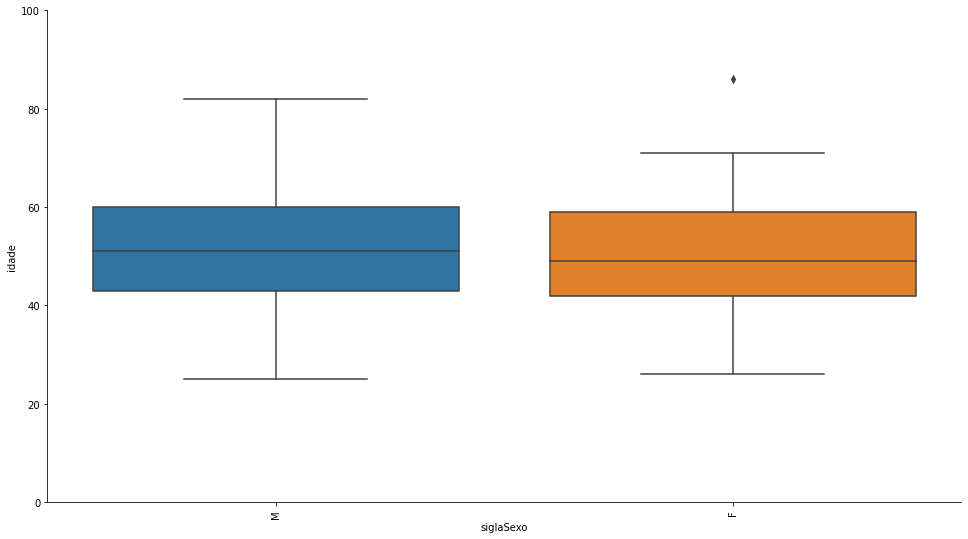

In [51]:
g=sns.catplot(x="siglaSexo",y="idade",kind="box",data=dl)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,100))

### Orientação

Para votações de qualquer tipo, os Partidos e Blocos, bem como as lideranças de Governo, Minoria, Maioria e Oposição, podem recomendar a seus Deputados que votem de um jeito ou de outro, ou podem "liberar a bancada"

In [52]:
# dfO[:3]

In [53]:
new_df = df.drop([ 'uri', 'data', 'dataHoraRegistro', 'idOrgao', 'uriOrgao',
         'uriEvento',  'descricao' ,'ultimaApresentacaoProposicao_idProposicao',
       'ultimaApresentacaoProposicao_uriProposicao'], axis=1)
new_df.columns = ['idVotacao', 'siglaOrgao', 'idEvento', 'aprovacao', 'votosSim', 'votosNao',
       'votosOutros']

In [54]:
## datatset with voting and orientation of each party for each voting id
new2 = pd.merge(new_df,dfO, on ='idVotacao')

In [55]:
# new2['orientacao'].value_counts()
new2['orientacao'] = new2['orientacao'].map({'Sim': 1, 'Não': 0, "Obstrução":2, "Liberado":3 })

https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/

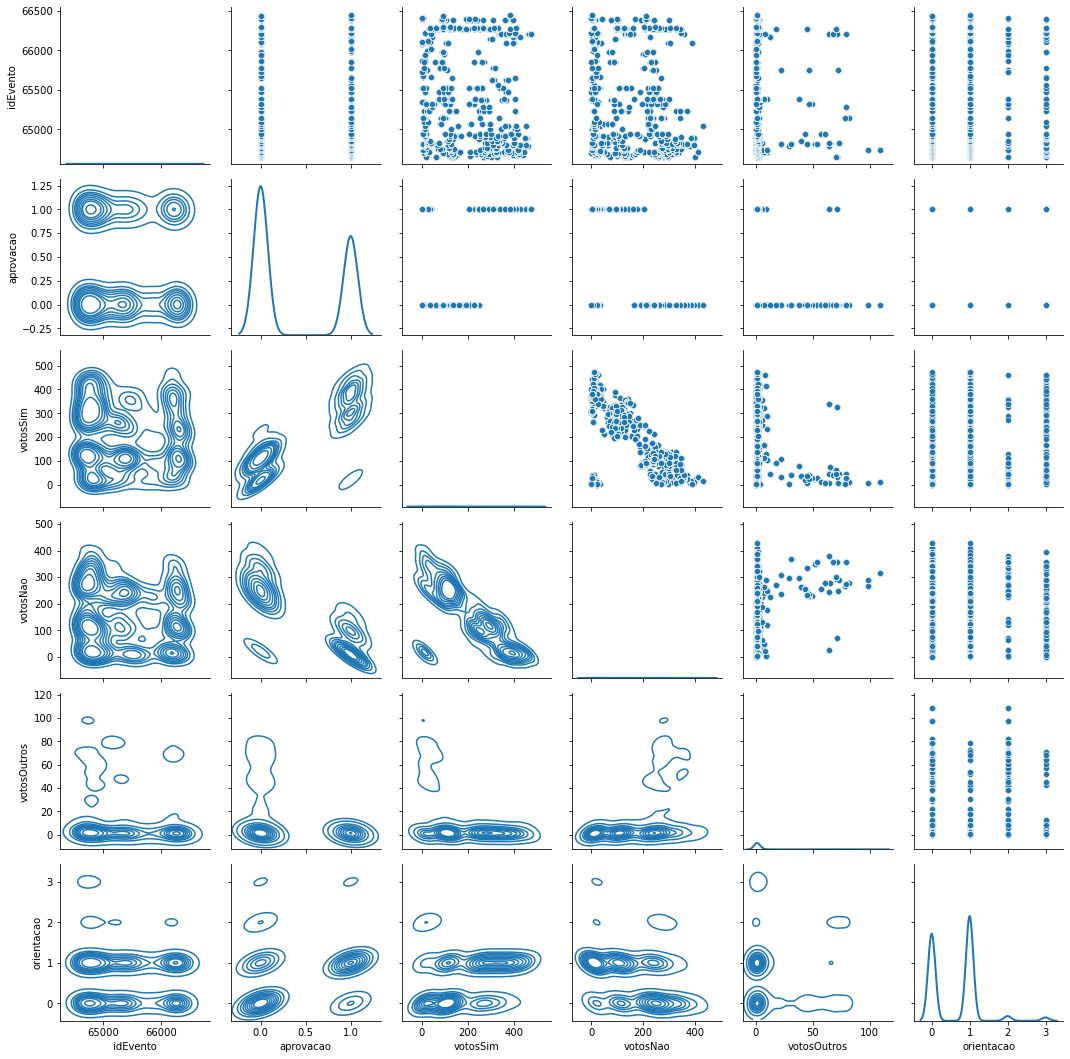

In [56]:
    g = sns.PairGrid(new2)
    g = g.map_upper(sns.scatterplot)
    g = g.map_lower(sns.kdeplot, colors="C0")
    g = g.map_diag(sns.kdeplot, lw=2)

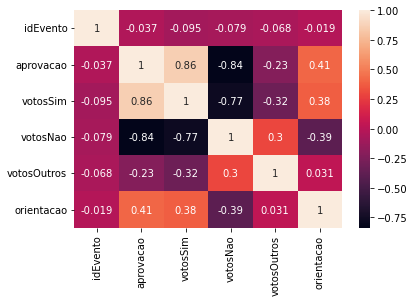

In [57]:
data = pd.DataFrame(new2,columns=[ 'idEvento', 'aprovacao', 'votosSim', 'votosNao',
       'votosOutros', 'orientacao'])

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [58]:
## datatset with voting and orientation of each party for each voting id
new3 = pd.merge(new_df,dfV, on ='idVotacao')
new3

,idVotacao,siglaOrgao,idEvento,aprovacao,votosSim,votosNao,votosOutros,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto
0,2312874-9,PLEN,64653,1.0,327,71,71,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-09T16:50:12,Sim,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...
1,2312874-9,PLEN,64653,1.0,327,71,71,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-09T16:45:19,Sim,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,http://www.camara.gov.br/internet/deputado/ban...
2,2312874-9,PLEN,64653,1.0,327,71,71,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-09T16:45:19,Sim,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,http://www.camara.gov.br/internet/deputado/ban...
3,2312874-9,PLEN,64653,1.0,327,71,71,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-09T16:48:36,Sim,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...
4,2312874-9,PLEN,64653,1.0,327,71,71,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-02-09T16:46:15,Sim,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,http://www.camara.gov.br/internet/deputado/ban...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166631,2314962-33,PLEN,66455,1.0,383,3,1,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11T17:57:16,Sim,160518,https://dadosabertos.camara.leg.br/api/v2/depu...,Weliton Prado,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...
166632,2314962-33,PLEN,66455,1.0,383,3,1,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11T17:57:31,Sim,74043,https://dadosabertos.camara.leg.br/api/v2/depu...,Wellington Roberto,PL,https://dadosabertos.camara.leg.br/api/v2/part...,PB,56,http://www.camara.gov.br/internet/deputado/ban...
166633,2314962-33,PLEN,66455,1.0,383,3,1,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11T17:57:04,Sim,178889,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Carlos,PT,https://dadosabertos.camara.leg.br/api/v2/part...,MA,56,http://www.camara.gov.br/internet/deputado/ban...
166634,2314962-33,PLEN,66455,1.0,383,3,1,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-10-11T18:02:09,Sim,204559,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Neto,PT,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...


In [59]:
#Maneira de votar- contagem de votos partidos
def voteType(party):
    party = dfV.loc[dfV["deputado_siglaPartido"] == party]
    voting = party["voto"].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,10))
    return voting